In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the data

In [3]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [5]:
y.shape, tx.shape

((10000,), (10000, 2))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [124]:
def compute_loss_MSE(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    e = (y - tx.dot(w))
    return 1/len(y) * e.dot(e)
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    
    e = np.abs(y - tx.dot(w))
    return 1/len(y) *e.sum()

print(compute_loss(y, tx, np.array((1,2)).T))

73.0678058549


# 2 Grid Search

Fill in the function `grid_search()` below:

In [125]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    for i in range(0, len(w0)):
        for j in range(0, len(w1)):
            losses[i, j] = compute_loss(y, tx, (w0[i], w1[j]))
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=5.464204730460844, w0*=71.42857142857142, w1*=15.306122448979579, execution time=0.021 seconds


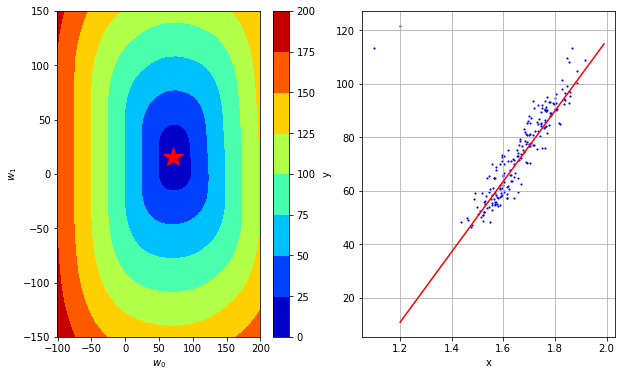

In [126]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=50)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [127]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    return -1 / len(y) * tx.T.dot(y - tx.dot(w))

print(compute_gradient(y, tx, np.array((50,100)).T))

[-24.06780585  88.96510513]


Please fill in the functions `gradient_descent` below:

In [128]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        gradient = compute_gradient(y, tx, w)
        loss = compute_loss(y, tx, w)
        w = w - gamma*gradient
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [139]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = .07

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=74.06780585492638, w0=5.184746409844843, w1=0.7724426406192421
Gradient Descent(1/49): loss=68.88305944508154, w0=10.006560571000552, w1=1.4908142963951376
Gradient Descent(2/49): loss=64.06124528392583, w0=14.49084774087536, w1=2.1588999362667196
Gradient Descent(3/49): loss=59.576958114051024, w0=18.66123480885893, w1=2.780219581347292
Gradient Descent(4/49): loss=55.40657104606745, w0=22.53969478208365, w1=3.358046851272223
Gradient Descent(5/49): loss=51.52811107284273, w0=26.14666255718264, w1=3.8954262123024086
Gradient Descent(6/49): loss=47.92114329774374, w0=29.501142588024706, w1=4.395189018060481
Gradient Descent(7/49): loss=44.56666326690167, w0=32.620809016707824, w1=4.859968427415488
Gradient Descent(8/49): loss=41.44699683821855, w0=35.52209879538312, w1=5.292213278115644
Gradient Descent(9/49): loss=38.54570705954325, w0=38.22029828955115, w1=5.694200989266789
Gradient Descent(10/49): loss=35.847507565375224, w0=40.72962381912742, w1=6.06804

<function __main__.plot_figure>

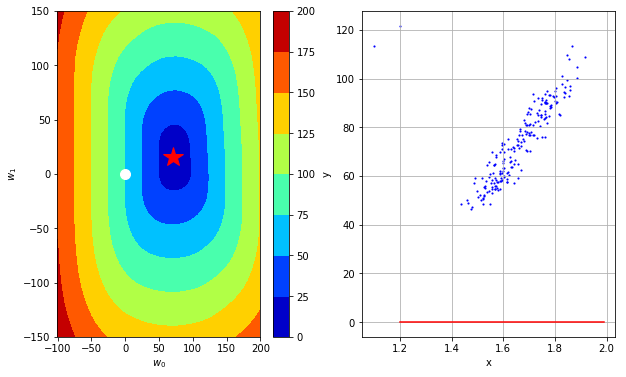

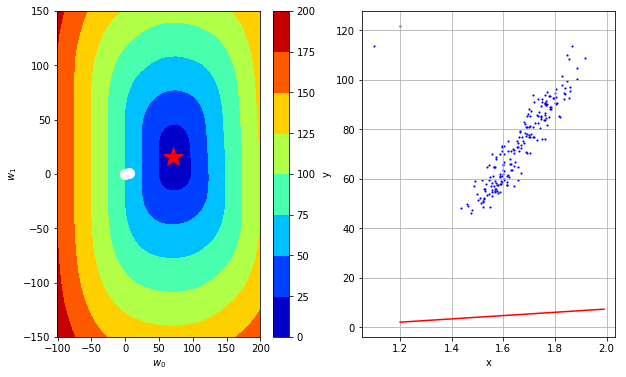

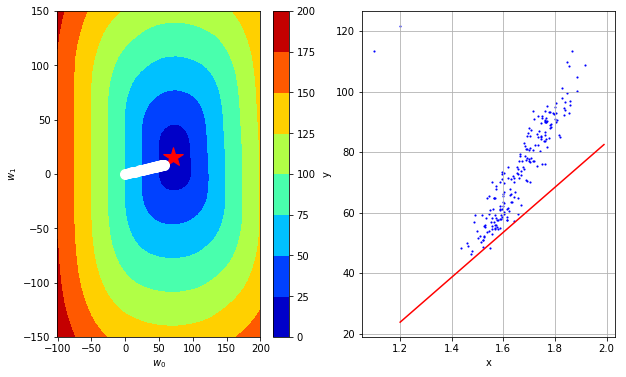

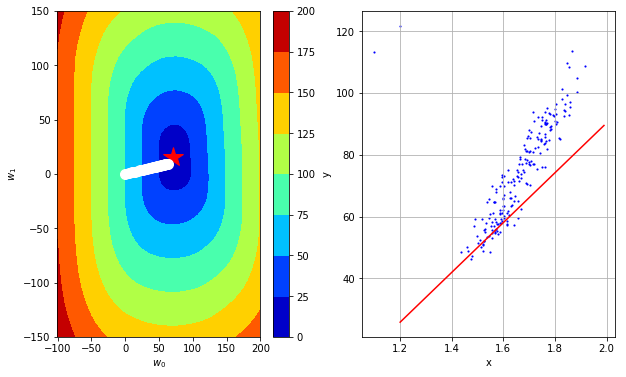

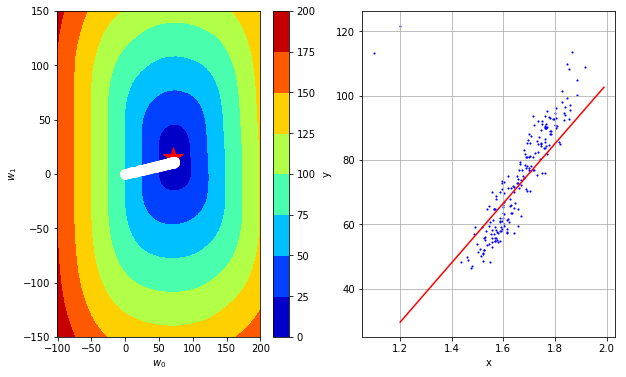

In [140]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

# 4 Stochastic gradient descent

In [131]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    return compute_gradient(y,tx,w)


def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    n_iter = 0
    for batch_y, batch_x in batch_iter(y, tx, batch_size, max_iters):
        gradient = compute_stoch_gradient(batch_y, batch_x, w)
        loss = compute_loss(batch_y, batch_x, w)
        w = w - gamma*gradient
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Stochastic Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
        n_iter+=1

    return losses, ws

In [137]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 5

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Stochastic Gradient Descent(0/49): loss=62.022534186831244, w0=43.41577393078187, w1=-20.106718718759975
Stochastic Gradient Descent(1/49): loss=48.615356145555985, w0=77.44652323267105, w1=13.713345201579546
Stochastic Gradient Descent(2/49): loss=4.023992207059973, w0=74.65066702127965, w1=12.738629027307109
Stochastic Gradient Descent(3/49): loss=2.952299241142005, w0=72.78105240659659, w1=12.587546025265485
Stochastic Gradient Descent(4/49): loss=4.324715516783871, w0=75.8083532683453, w1=13.682331447394953
Stochastic Gradient Descent(5/49): loss=7.232398083277379, w0=72.89651451503211, w1=15.031450526662532
Stochastic Gradient Descent(6/49): loss=4.405449677770072, w0=71.89860126134441, w1=16.171228548388296
Stochastic Gradient Descent(7/49): loss=3.479904482741917, w0=74.33453439926375, w1=17.72161129653644
Stochastic Gradient Descent(8/49): loss=4.964959443327138, w0=75.56218295468987, w1=16.725615153331916
Stochastic Gradient Descent(9/49): loss=7.0306127057869405, w0=74.255911

ZeroDivisionError: division by zero

<function __main__.plot_figure>

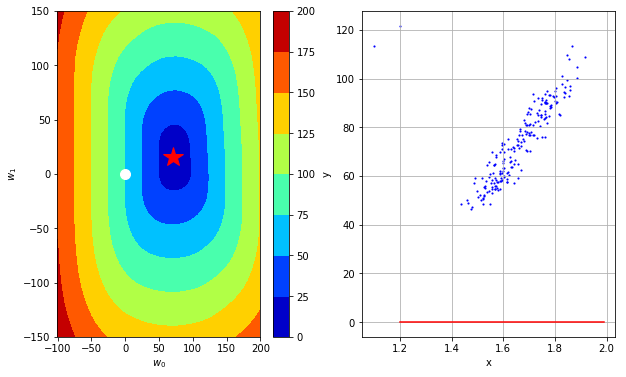

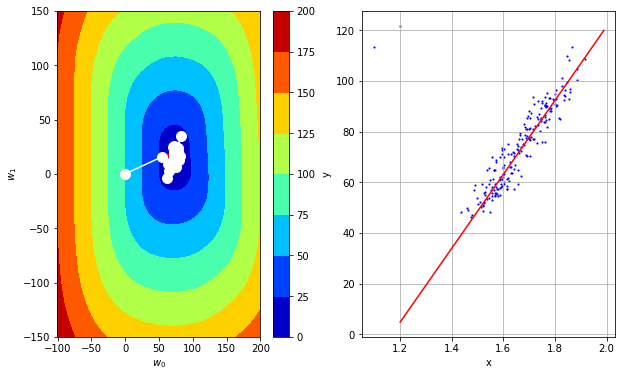

In [138]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

# 5 Effect of Outliers and MAE Cost Function, and Subgradient Descent

### Exercise 5

Load and plot data containing outliers

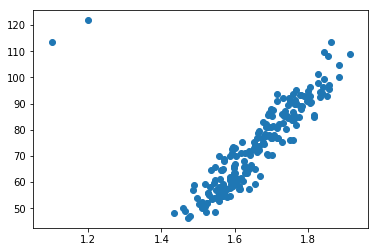

In [114]:
from plots import *
height, weight, gender = load_data(True, True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)
plt.scatter(height, weight)
plt.show()

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)